# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# Substitua 'caminho/do/arquivo/demo01.csv' pelo caminho real do seu arquivo CSV
caminho_do_arquivo = 'Demofinal.csv'

# Carregar a base de dados
dados_demo = pd.read_csv(caminho_do_arquivo)

In [24]:
# Identificar colunas categóricas
categoricas = dados_demo.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding nas colunas categóricas
dados_demo = pd.get_dummies(dados_demo, columns=categoricas, drop_first=True)

# Separar as variáveis explicativas e a variável resposta
X = dados_demo.drop('mau', axis=1)
y = dados_demo['mau']

# Separar os dados para treinamento e validação
from sklearn.model_selection import train_test_split
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.3, random_state=100)

In [25]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
dados_demo.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [27]:
dados_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  bool   
 9   sexo_M                                  16650 non-null  bool   
 10  posse_de_veiculo_Y                      16650 non-null  bo

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [34]:
# 1. Criar o modelo
modelo_arvore = DecisionTreeClassifier(random_state=100)

In [35]:
# 2. Treinar o modelo
modelo_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=100)

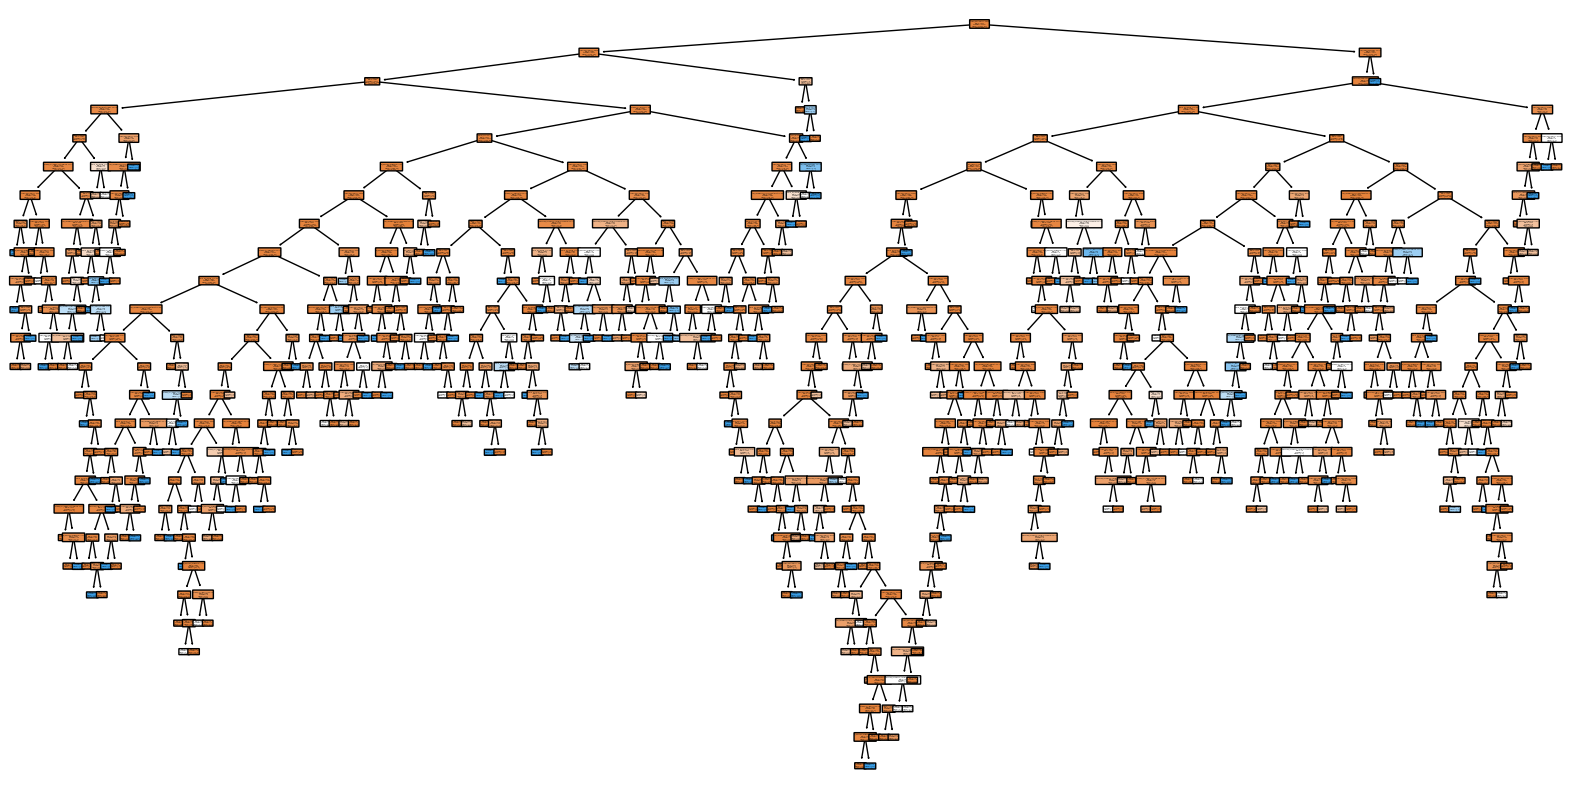

In [29]:
# Visualize a árvore
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X_treino.columns.tolist(), class_names=['mau', 'sexo_M'], rounded=True)
plt.show()

In [30]:
# 4. Produza uma visualização da matriz de classificação (ou matriz de confusão)
y_pred_treino = modelo_arvore.predict(X_treino)
matriz_confusao = confusion_matrix(y_treino, y_pred_treino)

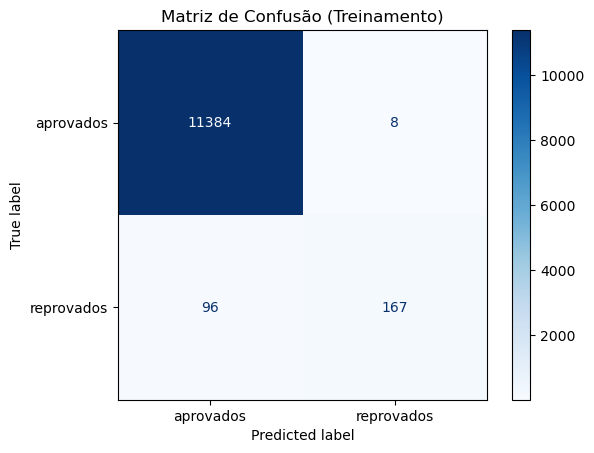

In [31]:
# Plotando a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['aprovados', 'reprovados'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão (Treinamento)")
plt.show()

In [32]:
# 5. Calcule a acurácia na base de treinamento
acuracia_treino = accuracy_score(y_treino, y_pred_treino)
print(f'Acurácia na base de treinamento: {acuracia_treino:.2%}')

Acurácia na base de treinamento: 99.11%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [38]:
# 1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
X_teste = dados_demo.drop('mau', axis=1)
y_teste = dados_demo['mau']

y_pred_teste = modelo_arvore.predict(X_teste)

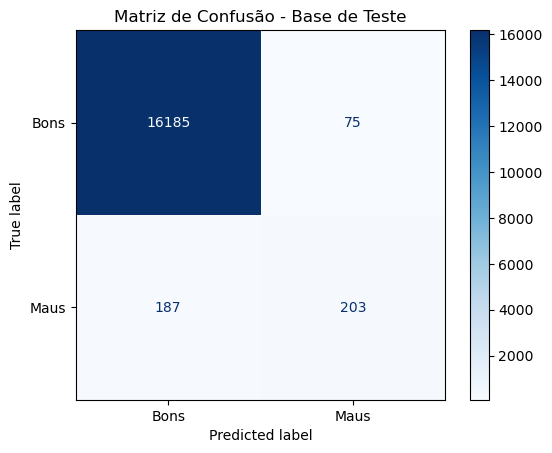

In [39]:
# 2. Produza a visualização da matriz de confusão para a base de teste.

# Calcular a matriz de confusão
cm = confusion_matrix(y_teste, y_pred_teste)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bons', 'Maus'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Matriz de Confusão - Base de Teste')
plt.show()

In [40]:
# 3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
# Calcular acurácia para a base de treinamento
acuracia_treino = accuracy_score(y_treino, y_pred_treino)

# Calcular acurácia para a base de teste
acuracia_teste = accuracy_score(y_teste, y_pred_teste)

print(f'Acurácia na base de treinamento: {acuracia_treino:.4f}')
print(f'Acurácia na base de teste: {acuracia_teste:.4f}')

Acurácia na base de treinamento: 0.9911
Acurácia na base de teste: 0.9843


In [41]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123.
# Criar um novo modelo de árvore com os parâmetros desejados
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o modelo com os dados de treinamento
nova_arvore.fit(X_treino, y_treino)

# Fazer previsões na base de teste
y_pred_nova_arvore = nova_arvore.predict(X_teste)

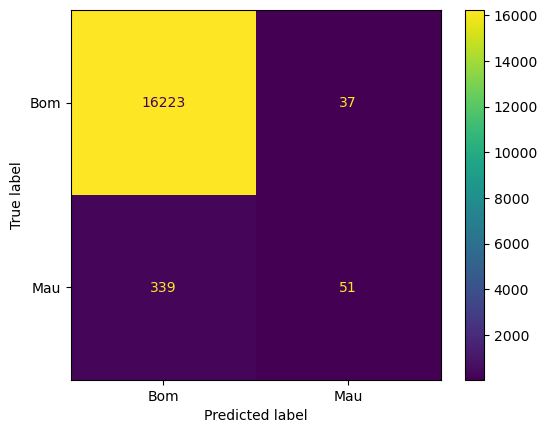

In [42]:
# avalie a matriz
# Calcular a matriz de confusão
cm_nova_arvore = confusion_matrix(y_teste, y_pred_nova_arvore)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nova_arvore, display_labels=['Bom', 'Mau'])
disp.plot()
plt.show()

In [43]:
# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = np.sum(y_pred_nova_arvore) / len(y_pred_nova_arvore)

# Exibir a proporção
print(f'A proporção de proponentes classificados como "maus" é: {proporcao_maus:.2%}')

A proporção de proponentes classificados como "maus" é: 0.53%


In [44]:
# Acurácia considerando todos os contratos como 'bons'
acuracia_todos_bons = np.sum(y_teste == 0) / len(y_teste)

# Exibir a acurácia
print(f'A acurácia ao classificar todos os contratos como "bons" seria: {acuracia_todos_bons:.2%}')

A acurácia ao classificar todos os contratos como "bons" seria: 97.66%
